# Feature Transformation
- missing value imputation
- handling categorical features
- outlier detection,handling outlier
- feature scaling

### Feature scalling
This the last thing that we do in machine learning, just before giving the data to the model

In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [245]:
url='https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv'
df1=pd.read_csv(url)

In [246]:
df1.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
313,15753861,Female,49,141000,1
180,15685576,Male,26,16000,0
211,15735878,Male,52,150000,1
61,15673619,Male,25,87000,0
223,15593715,Male,60,102000,1


In [247]:
df1=df1.iloc[:, 2:]
df1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [248]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df1.drop('Purchased',axis=1),df1['Purchased'],test_size=0.3,random_state=0)

In [249]:
xtrain

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [250]:
xtrain.shape, xtest.shape


((280, 2), (120, 2))

## Standardization: here the mean=0 and SD=1. 
### the scaling is performed using the formula (x-x')/s.d  
#### x=value in clolumn for which scaling is needed, x'=mean of the column and s.d= standard deviation


In [251]:
#now will perform stardard deviation usning sklearn
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

#fit the scalar to train set,it will learn the parameters
scalar.fit(xtrain)
# the mean s.d all calculated and stored in scalar object

#now transform train and test sets, here the model learn using the train data but we will transform both train and test 
xtrain_scaled=scalar.transform(xtrain)
xtest_scaled=scalar.transform(xtest)



In [252]:
xtrain_scaled=pd.DataFrame(xtrain_scaled, columns=xtrain.columns)
xtest_scaled=pd.DataFrame(xtest_scaled, columns=xtrain.columns)

### before scalling and after scalling effect

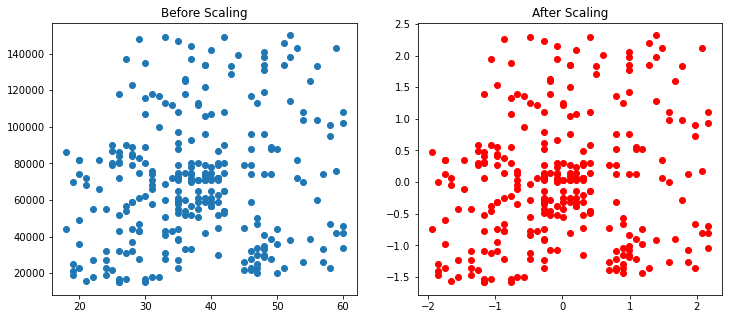

In [253]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(xtrain['Age'], xtrain['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(xtrain_scaled['Age'],xtrain_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

<AxesSubplot:title={'center':'After scaling'}, xlabel='Age', ylabel='Density'>

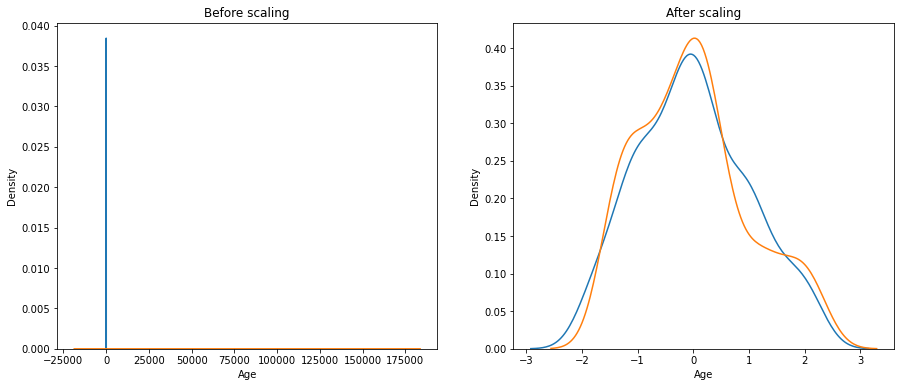

In [254]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(15,6))

#PDE graphs
#before scaling
ax1.set_title('Before scaling')
sns.kdeplot(xtrain['Age'],ax=ax1)
sns.kdeplot(xtrain['EstimatedSalary'],ax=ax1)
ax2.set_title('After scaling')
sns.kdeplot(xtrain_scaled['Age'],ax=ax2)
sns.kdeplot(xtrain_scaled['EstimatedSalary'],ax=ax2)

### Example of logistic regressing using scaled and unscaled data sets

In [255]:
from sklearn.linear_model import LogisticRegression

In [256]:

lr_x=LogisticRegression()
lr_xscaled=LogisticRegression()

lr_x.fit(xtrain,ytrain)
lr_xscaled.fit(xtrain_scaled,ytrain)

LogisticRegression()

In [257]:
y_pred=lr_x.predict(xtest)
y_pred_scaled=lr_xscaled.predict(xtest_scaled)

In [258]:
from sklearn.metrics import accuracy_score

In [259]:
print('axtual',accuracy_score(ytest,y_pred))
print('scaled',accuracy_score(ytest,y_pred_scaled))

axtual 0.6583333333333333
scaled 0.8666666666666667


#### In some algorithms like decesion tree scalling will not affect anything, below is the example

In [260]:
from sklearn.tree import DecisionTreeClassifier

In [261]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

dt.fit(xtrain,ytrain)
dt_scaled.fit(xtrain_scaled,ytrain)

y_pred=dt.predict(xtest)
y_pred_scaled=dt_scaled.predict(xtest_scaled)

In [262]:
print('axtual',accuracy_score(ytest,y_pred))
print('scaled',accuracy_score(ytest,y_pred_scaled))

axtual 0.875
scaled 0.875


# Normalization
## MinMax scaling

In [263]:
wine=pd.read_csv('winequalityN.csv')

In [264]:
wine.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3263,white,6.5,0.26,0.31,3.6,0.030,36.0,92.0,0.99026,3.22,0.62,12.6,8
2758,white,5.8,0.13,0.26,5.1,0.039,19.0,103.0,0.99478,3.36,0.47,9.3,6
6050,red,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5
5021,red,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.99760,3.44,0.53,9.5,5
1291,white,7.5,0.23,0.32,9.2,0.038,54.0,191.0,0.99660,3.04,0.56,9.7,6


In [265]:
a=wine.replace(['white','red'],[1,0])
a=a.sample(n=500)

In [266]:
new=a.iloc[:,[0,3,11]]
new

,type,citric acid,alcohol
336,1,0.33,11.2
1068,1,0.44,12.6
4040,1,0.29,9.4
13,1,0.40,12.4
5549,0,0.25,11.2
...,...,...,...
2438,1,0.28,9.4
2600,1,0.42,11.3
6169,0,0.20,11.7
6471,0,0.20,12.5


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

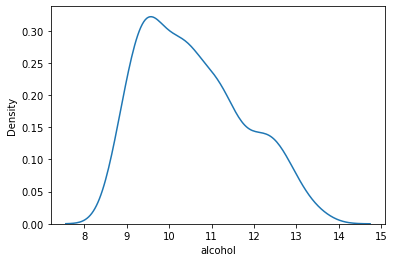

In [267]:

#sns.distplot(new['alcohol'], hist=False)
sns.kdeplot(new['alcohol'])

C:\Users\darsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol', ylabel='citric acid'>

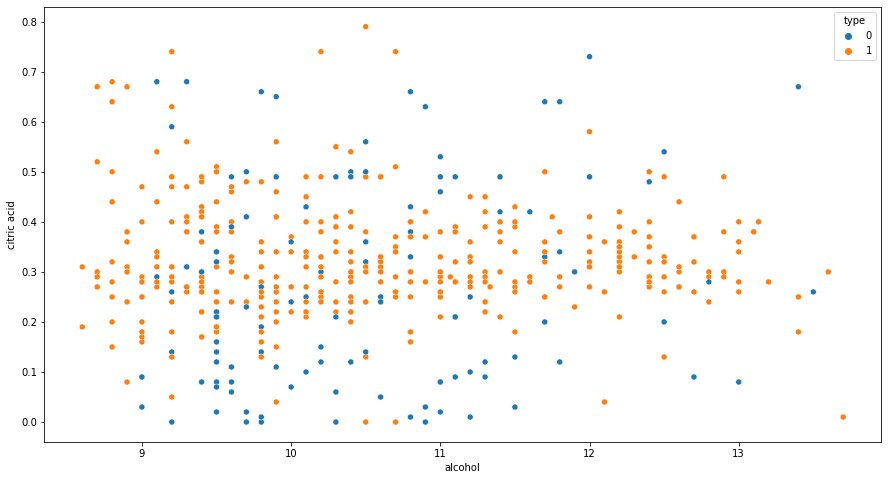

In [268]:
plt.figure(figsize=(15,8))
sns.scatterplot(new['alcohol'],new['citric acid'],hue=new['type'])

In [269]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(new.drop('type',axis=1),new['type'],test_size=0.2,random_state=0)

In [270]:
xtr.shape, xte.shape

((400, 2), (100, 2))

In [271]:
from sklearn.preprocessing import MinMaxScaler

sca=MinMaxScaler()

#fit the scaler to the train set, wt will learn parameters
sca.fit(xtr)

#transform train and test sets
xtr_s=sca.transform(xtr)
xte_s=sca.transform(xte)

xtr_s.shape, xte_s.shape

((400, 2), (100, 2))

In [272]:
#the transformed data will be in numpy array so to convert it to dataframe
xtr_s=pd.DataFrame(xtr_s,columns=xtr.columns)
xte_s=pd.DataFrame(xte_s,columns=xte.columns)

In [273]:
import numpy as np
np.round(xtr_s.describe(),1)

,citric acid,alcohol
count,400.0,400.0
mean,0.4,0.4
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.4,0.4
75%,0.5,0.5
max,1.0,1.0


In [274]:
np.round(xtr.describe(),1)

,citric acid,alcohol
count,400.0,400.0
mean,0.3,10.6
std,0.1,1.2
min,0.0,8.6
25%,0.2,9.5
50%,0.3,10.4
75%,0.4,11.4
max,0.8,13.7


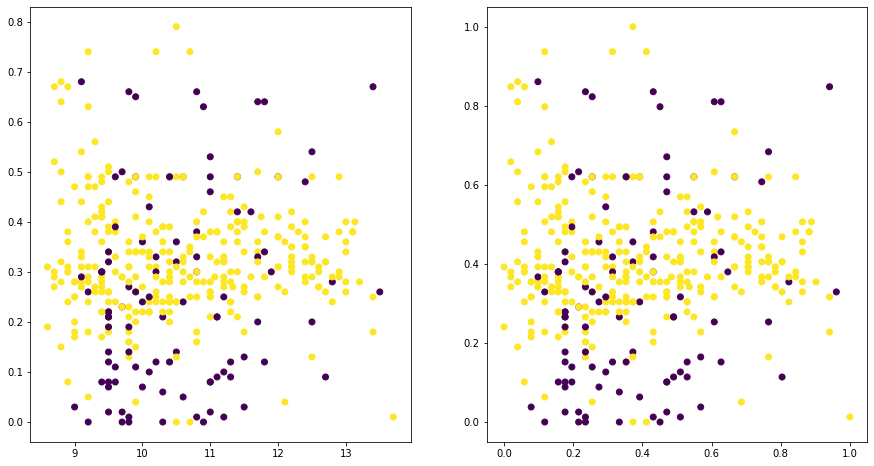

In [280]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))

ax1.scatter(xtr['alcohol'],xtr['citric acid'],c=ytr)
ax2.scatter(xtr_s['alcohol'],xtr_s['citric acid'],c=ytr)
plt.show()

<AxesSubplot:title={'center':'after scaling'}, xlabel='alcohol', ylabel='Density'>

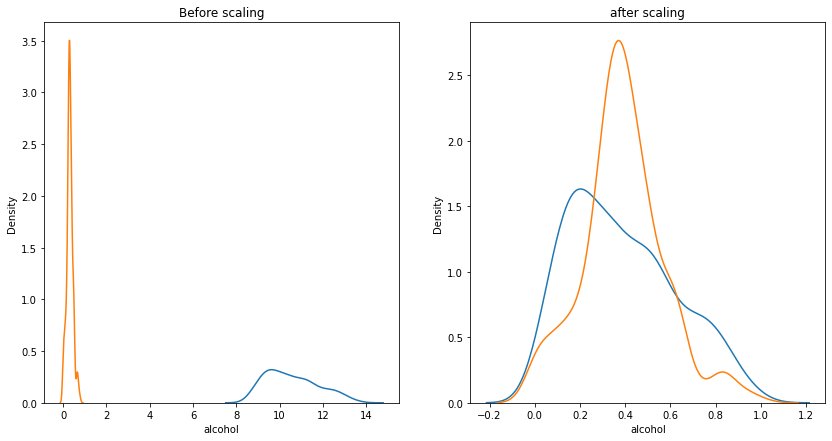

In [284]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(14,7))

#before scaling
ax1.set_title('Before scaling')
sns.kdeplot(xtr['alcohol'],ax=ax1)
sns.kdeplot(xtr['citric acid'],ax=ax1)

#after scaling
ax2.set_title('after scaling')
sns.kdeplot(xtr_s['alcohol'],ax=ax2)
sns.kdeplot(xtr_s['citric acid'],ax=ax2)

<AxesSubplot:title={'center':'after scaling'}, xlabel='citric acid', ylabel='Density'>

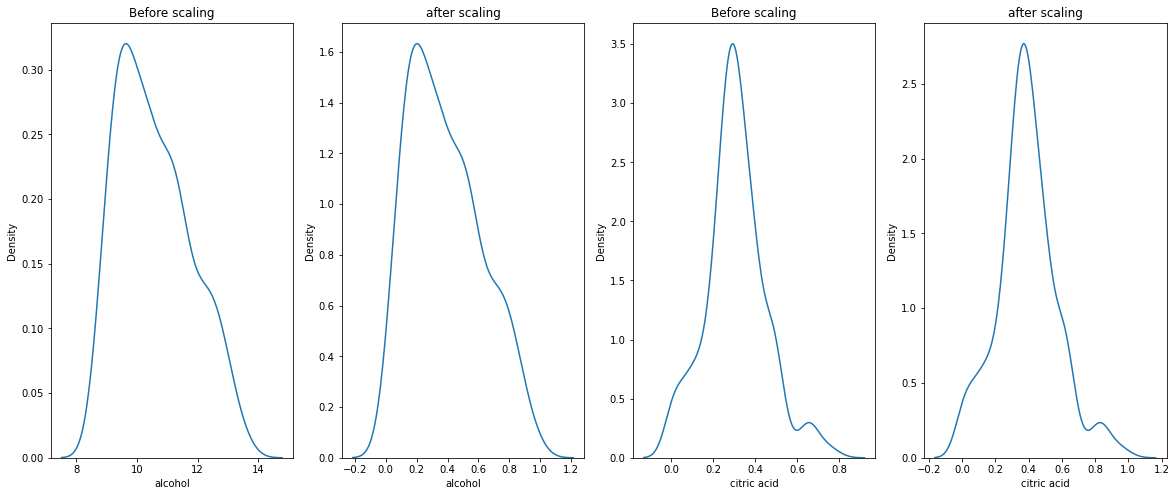

In [292]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(ncols=4, figsize=(20,8))


ax1.set_title('Before scaling')
sns.kdeplot(xtr['alcohol'],ax=ax1)

ax2.set_title('after scaling')
sns.kdeplot(xtr_s['alcohol'],ax=ax2)

ax3.set_title('Before scaling')
sns.kdeplot(xtr['citric acid'],ax=ax3)

ax4.set_title('after scaling')
sns.kdeplot(xtr_s['citric acid'],ax=ax4)